# Customer Segmentation using K-Means

# Importing Libraries

Now lets look at some basic details the dataset can tell us like the dimensions and count/mean etc of the various features in the dataset. Also lets rename the 2 columns with long names into ones we can easily access.

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings("ignore")

C:\Users\MU\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MU\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\MU\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.rename(columns={'Spending Score (1-100)':'SpendingScore','Annual Income (k$)':'AnnualIncome'},inplace=True)

df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Visualization

Plot some basic graphs with the help of matplotlib library and seaborn.

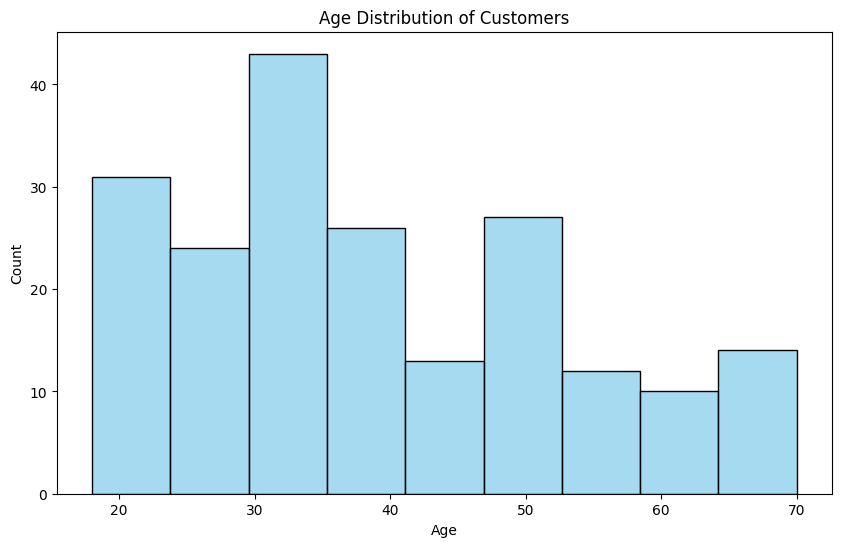

In [5]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(data=df,x="Age",color="skyblue")
plt.title("Age Distribution of Customers")
plt.show()

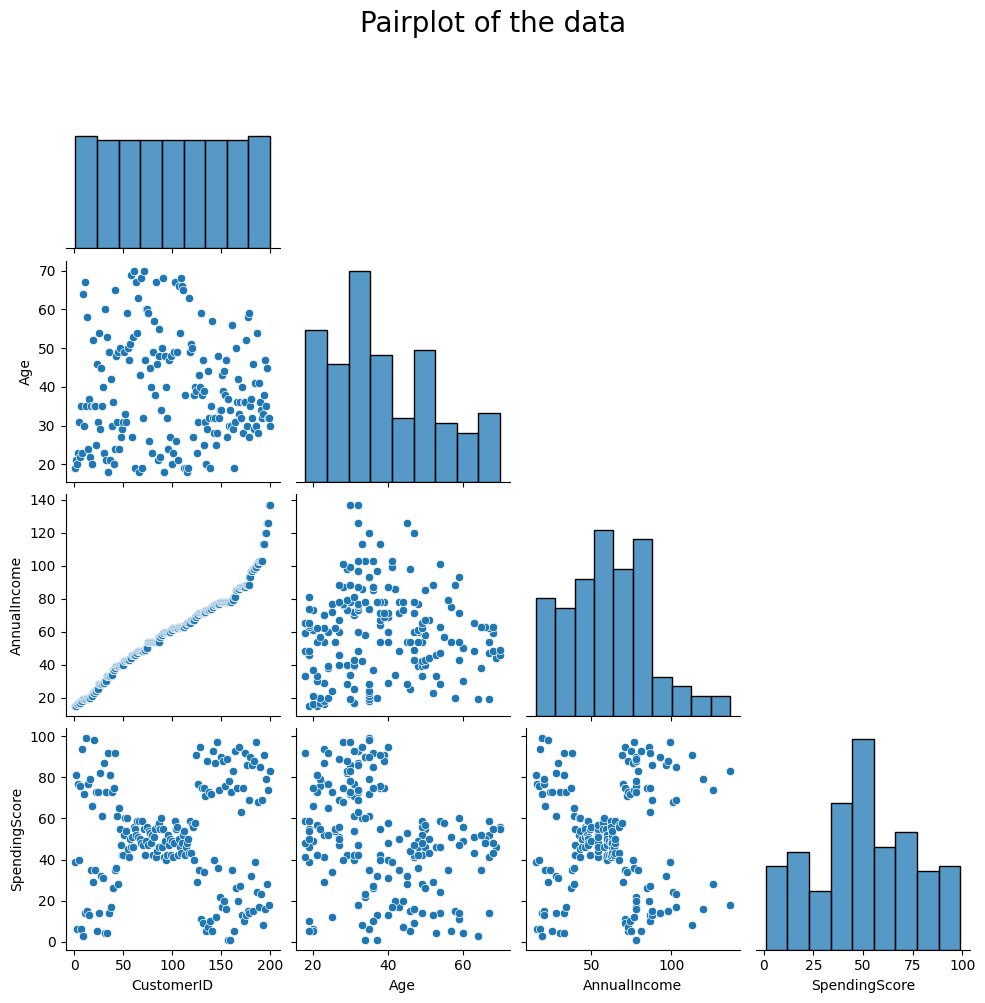

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt 

df.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']
plot = sns.pairplot(data=df, corner = True)
plot.fig.suptitle("Pairplot of the data", y = 1, fontsize = 20) 
plt.show()

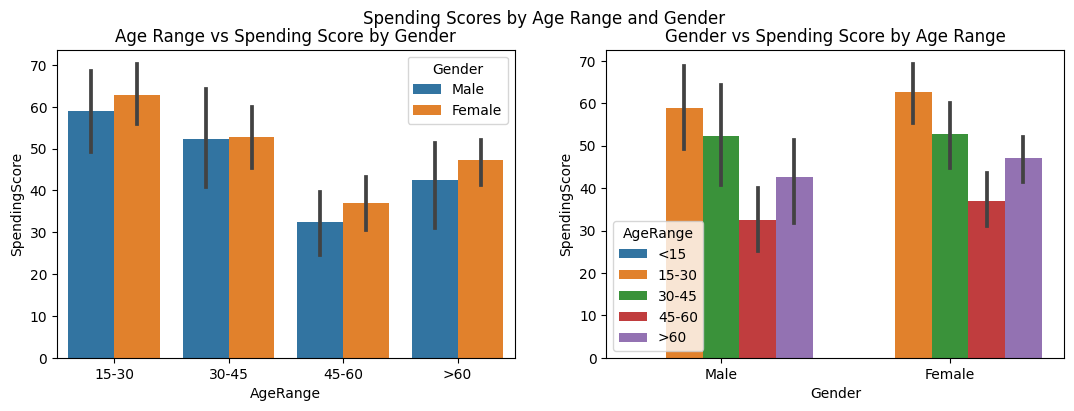

In [7]:
df['AgeRange'] = pd.cut(df["Age"],bins=[0, 15, 30, 45, 60, np.inf],labels=['<15', '15-30', '30-45', '45-60', '>60'])
fig, axes = plt.subplots(1, 2, figsize = (13, 4))
fig.suptitle('Spending Scores by Age Range and Gender')

sns.barplot(ax=axes[0], data = df, x='AgeRange', order = ['15-30', '30-45','45-60', '>60'] , y = 'SpendingScore', hue = 'Gender')
axes[0].set_title('Age Range vs Spending Score by Gender')
sns.barplot(ax=axes[1], data = df, x='Gender', y = 'SpendingScore', hue = 'AgeRange')
axes[1].set_title('Gender vs Spending Score by Age Range')
            
plt.show()

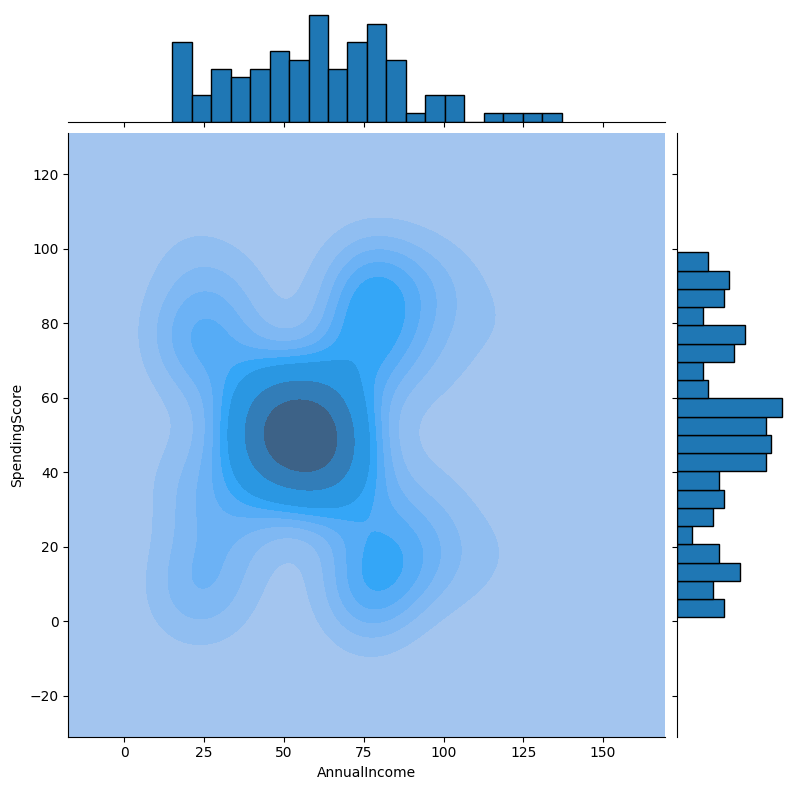

In [8]:
g = sns.JointGrid(data = df, height = 8, x = "AnnualIncome", y = "SpendingScore", space = 0.1)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0)
g.plot_marginals(sns.histplot, alpha = 1, bins = 20);

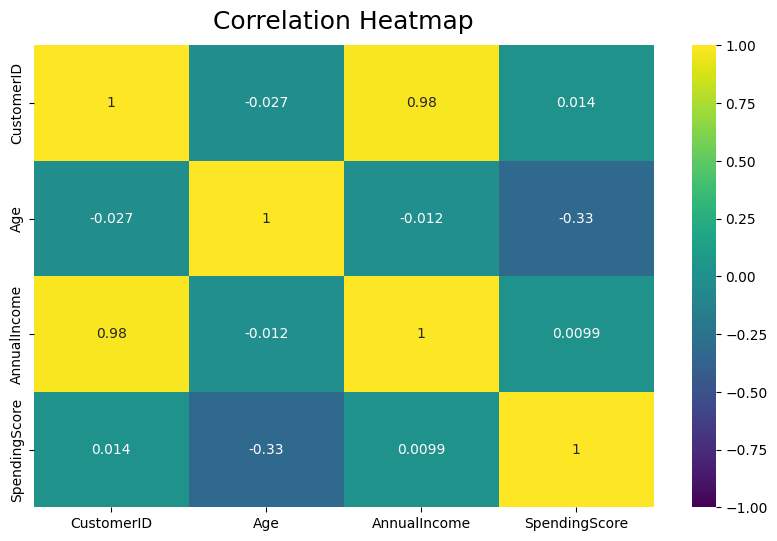

In [9]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

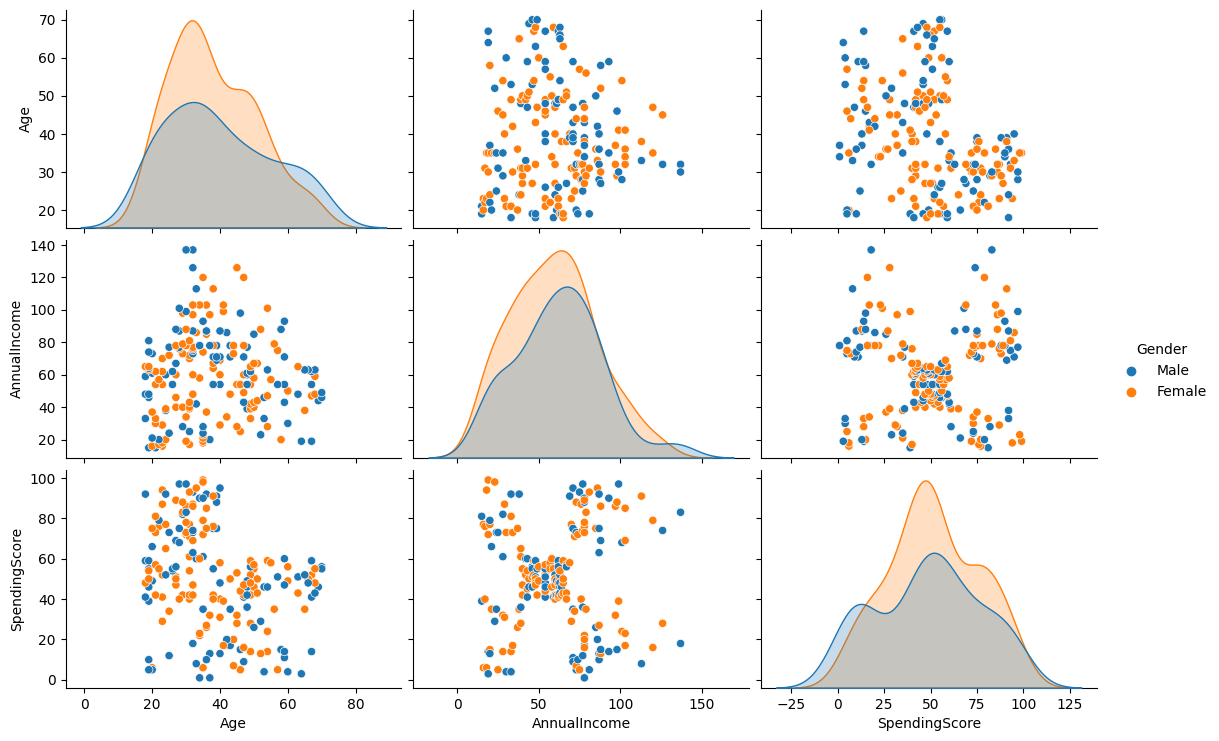

In [10]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

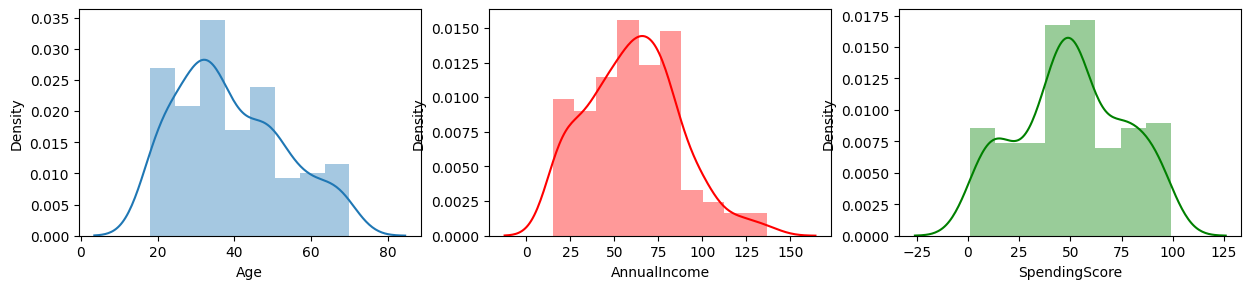

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.distplot(df['Age']);
plt.subplot(3,3,2)
sns.distplot(df['AnnualIncome'],color='red');
plt.subplot(3,3,3)
sns.distplot(df['SpendingScore'],color='green');

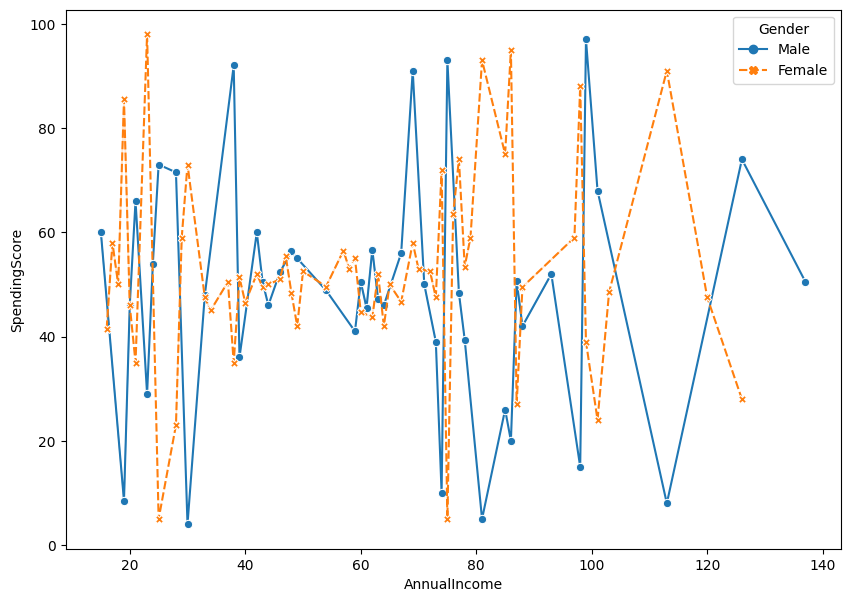

In [12]:
plt.figure(figsize=(10,7))
sns.lineplot(x='AnnualIncome',y='SpendingScore',hue='Gender',data=df,ci=False,style='Gender',markers=True);

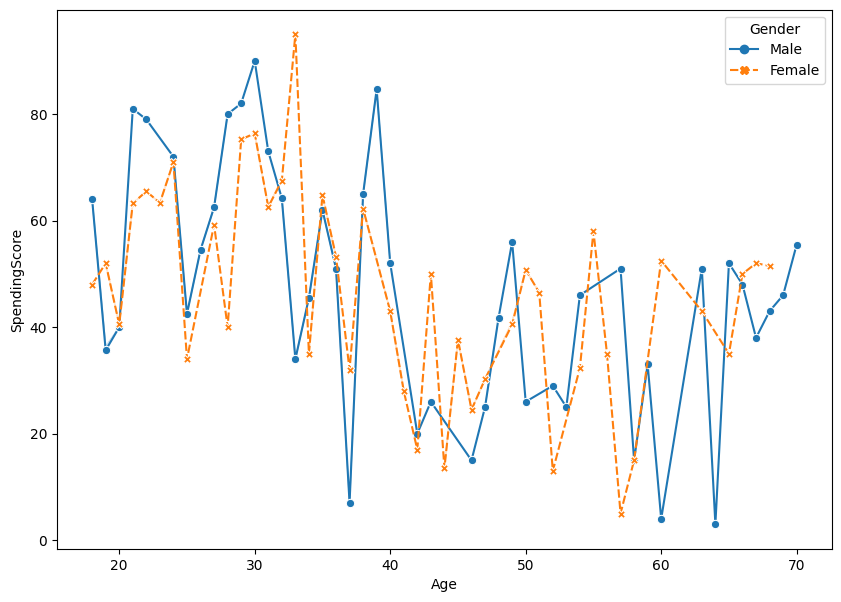

In [13]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Age',y='SpendingScore',hue='Gender',data=df,ci=False,style='Gender',markers=True);

# Building the clustering model with k-means

### Finding optimal number of clusters with Elbow Method

First, lets check the elbow curve for different number of clusters using a forloop to append the values of inertia of the K-means algorithm into a list and plotting them for a range of 1-10 clusters. K-Means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. Inertia tells us how far away the points within a cluster are. The value of inertia decreases as the number of clusters increase. The elbow point is the point in the graph when we notice a bend in the curve.

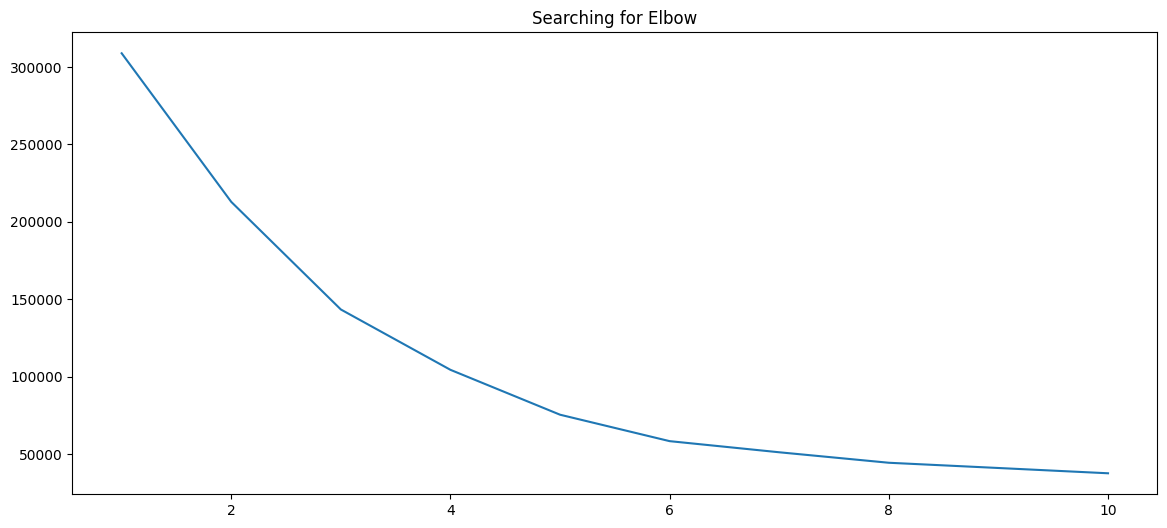

In [14]:
lenc=LabelEncoder()
df['Gender']=lenc.fit_transform(df['Gender'])
df.isna().sum()
df.drop('CustomerID',axis=1,inplace=True)
df.drop('AgeRange',axis=1,inplace=True)
cluster=list()
for i in range(1,11):
    kmns=KMeans(n_clusters=i)
    kmns.fit(df)
    cluster.append(kmns.inertia_)
plt.figure(figsize=(14,6))
sns.lineplot(x=list(range(1,11)),y=cluster).set(title='Searching for Elbow');

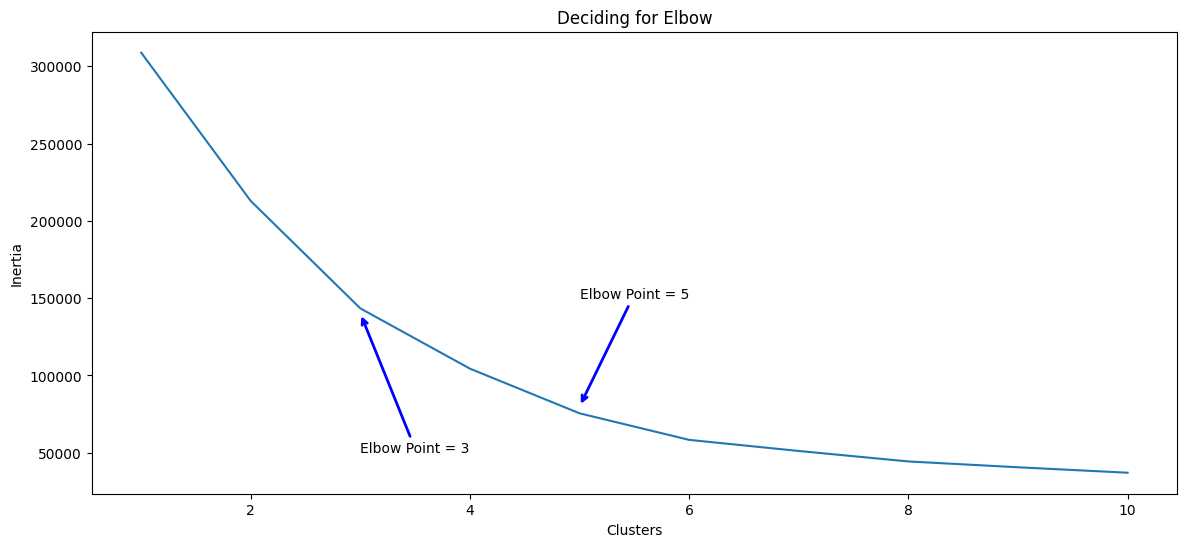

In [15]:
X = df.drop(['Gender'], axis=1)
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(14, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Deciding for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Elbow Point = 3', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Elbow Point = 5', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()

We notice 2 potential elbow points or "bends" i.e. one at approximately 3 and another at around 5. Thus we run K-means at both those points to form the requires clusters which we'll visualize eventually.

Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph, we can say this may be either 3 or 5. Let's see both results in graph and decide.

## Creating the Clusters

### 3 Clusters

In [16]:
Z = df.loc[:, ['AnnualIncome', 'SpendingScore']].values

In [17]:
n=3
kmeans = KMeans(n_clusters =3 , init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Z)

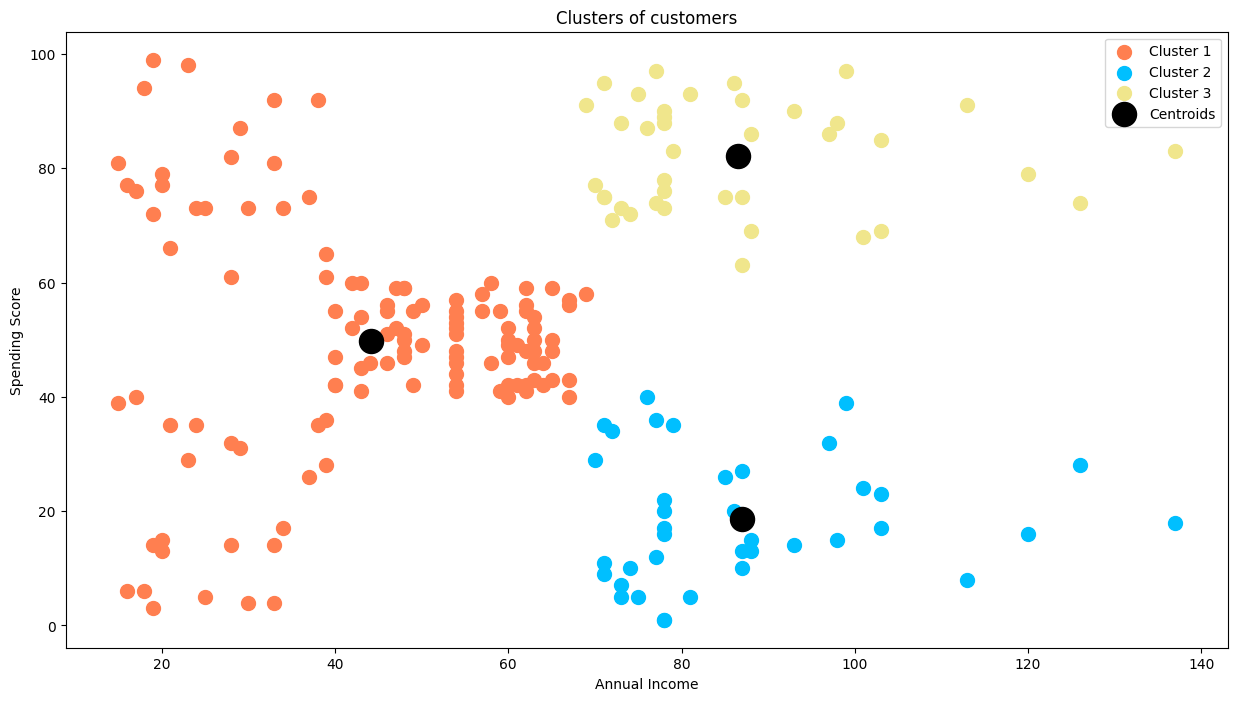

In [18]:
plt.figure(1 , figsize = (15 ,8))
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = 'coral', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = 'deepskyblue', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = 'khaki', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### 5 Clusters

In [19]:
Z = df.loc[:, ['AnnualIncome', 'SpendingScore']].values

In [20]:
n=5
kmeans = KMeans(n_clusters =5 , init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Z)

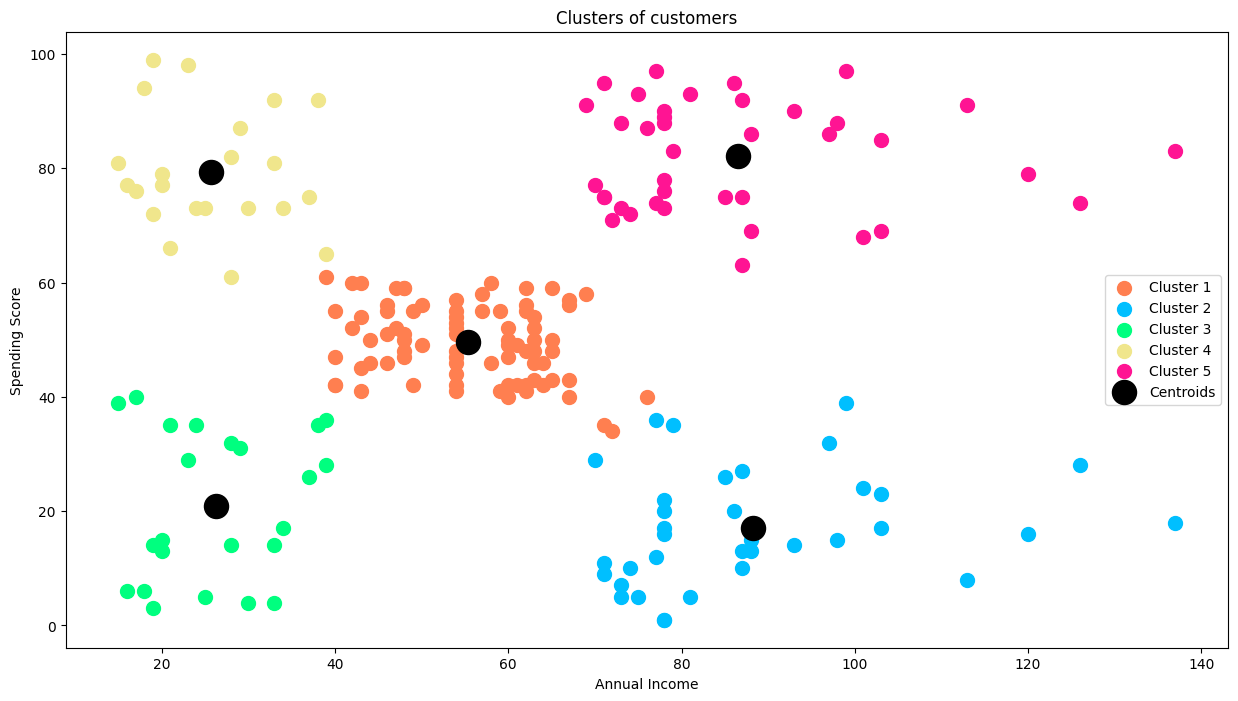

In [21]:
plt.figure(1 , figsize = (15 ,8))
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = 'coral', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = 'deepskyblue', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = 'springgreen', label = 'Cluster 3')
plt.scatter(Z[y_kmeans == 3, 0], Z[y_kmeans == 3, 1], s = 100, c = 'khaki', label = 'Cluster 4')
plt.scatter(Z[y_kmeans == 4, 0], Z[y_kmeans == 4, 1], s = 100, c = 'deeppink', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

By judging from the plots we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.

### `Done by Eng / Ahmed Salem`